# Exploratory Data Analysis of RNA & DNA Ligands

In [ ]:
! pip install pubchempy
! pip install biopython

In [ ]:
# Accessing Bio/ Chem databases
from Bio import Entrez
from Bio import Medline
import pubchempy as pcp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from tqdm import tqdm
import requests
import re

In [ ]:
rna_path = "/content/drive/MyDrive/Colab Notebooks/RNA-LIGAND-DATABASE/CSV-RNA-Ligands-Automated-Data/Section_One_RNA_Ligands_Automated_Fetched_Data.csv"

dna_path = "/content/drive/MyDrive/Colab Notebooks/RNA-LIGAND-DATABASE/Miscellaneous/section_one_naldb_DNA.csv"

In [ ]:
rna_df = pd.read_csv(rna_path)

In [ ]:
rna_df.head(1)

,Unnamed: 0,naldb_ID,pubmed_ID,ligand_name,target_name,canonical_SMILES,PDB,Resource,CID,molecular_formula,molecular_weight,isomeric_smiles,iupac_name,xlogp,image_url,SDF_file
0,0,APBD39,25699094,Cholesterol,nucleolin aptamer,[H][C@@]1(CC[C@@]2([H])[C@]3([H])CC=C4C[C@@]([...,NaN,Aptamers: active targeting ligands for cancer ...,5997,C27H46O,386.7,C[C@H](CCCC(C)C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3...,"(3S,8S,9S,10R,13R,14S,17R)-10,13-dimethyl-17-[...",8.7,https://pubchem.ncbi.nlm.nih.gov/rest/pug/comp...,https://pubchem.ncbi.nlm.nih.gov/rest/pug/comp...


In [ ]:
rna_ligand_smiles = rna_df['canonical_SMILES']

In [ ]:
dna_df = pd.read_csv(dna_path)
dna_df.head(1)

,Unnamed: 0,naldb_ID,pubmed_ID,ligand_name,target_name,canonical_SMILES
0,0,APBD1,24168267,ATP,SSA-1,NC1=NC=NC2=C1N=CN2C1OC(COP(O)(=O)OP(O)(=O)OP(O...


In [ ]:
dna_ligand_smiles = dna_df['canonical_SMILES']

In [ ]:
non_redundant_rna_ligand_smiles = np.unique(rna_ligand_smiles)
non_redundant_dna_ligand_smiles = np.unique(dna_ligand_smiles)

In [ ]:
rna_cids = list()
for SMILE in tqdm(non_redundant_rna_ligand_smiles):
  cid = pcp.get_compounds(SMILE, 'smiles')
  cid_extracted = re.findall(r'\d+', str(cid[0]))
  
  if len(cid_extracted)>=1:
    rna_cids.append(cid_extracted[0])

100%|██████████| 113/113 [00:58<00:00,  1.92it/s]


In [ ]:
len(rna_cids)

76

In [ ]:
dna_cids = list()
for SMILE in tqdm(non_redundant_dna_ligand_smiles):
  cid = pcp.get_compounds(SMILE, 'smiles')
  cid_extracted = re.findall(r'\d+', str(cid[0]))
  
  if len(cid_extracted)>=1:
    dna_cids.append(cid_extracted[0])

100%|██████████| 53/53 [00:25<00:00,  2.12it/s]


In [ ]:
pubchem_data = list()

In [ ]:
count = 0
for pubchem_cid in tqdm(dna_cids):
  compound = pcp.Compound.from_cid(pubchem_cid)
  pubchem_data.append((compound.atom_stereo_count, compound.charge, 
                           np.float32(compound.exact_mass), np.float32(compound.molecular_weight), 
                           compound.xlogp, compound.h_bond_donor_count, 
                           compound.h_bond_acceptor_count, "DNA"))
  if count>=5:
    time.sleep(1)
    count = 0
  count+=1

100%|██████████| 43/43 [00:11<00:00,  3.79it/s]


In [ ]:
count = 0
for pubchem_cid in tqdm(rna_cids):
  compound = pcp.Compound.from_cid(pubchem_cid)
  pubchem_data.append((compound.atom_stereo_count, compound.charge, 
                           np.float32(compound.exact_mass), np.float32(compound.molecular_weight), 
                           compound.xlogp, compound.h_bond_donor_count, 
                           compound.h_bond_acceptor_count, "RNA"))
  if count>=5:
    time.sleep(1)
    count = 0
  count+=1

100%|██████████| 76/76 [00:20<00:00,  3.62it/s]


In [ ]:
column_names = ['atom_stereo_count', 'charge', 'mass', 'mol_weight', ' xlogp', 'h_donor', 'h_acceptor', "ligand_type"]

In [ ]:
data = pd.DataFrame(pubchem_data, columns=column_names)

In [ ]:
data

,atom_stereo_count,charge,mass,mol_weight,xlogp,h_donor,h_acceptor,ligand_type
0,8,0,318.255890,318.500000,4.9,1,2,DNA
1,5,0,272.177643,272.399994,4.0,2,2,DNA
2,7,0,290.224579,290.399994,3.7,1,2,DNA
3,1,0,145.110275,145.199997,-1.0,2,3,DNA
4,0,0,45.057850,45.080002,-0.3,1,1,DNA
...,...,...,...,...,...,...,...,...
114,0,0,242.091614,242.240005,1.2,4,4,RNA
115,1,1,176.103516,176.190002,-4.3,4,3,RNA
116,1,2,176.127319,176.220001,-4.2,5,2,RNA
117,19,0,614.312256,614.599976,-9.0,13,19,RNA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   atom_stereo_count  119 non-null    int64  
 1   charge             119 non-null    int64  
 2   mass               119 non-null    float64
 3   mol_weight         119 non-null    float64
 4    xlogp             119 non-null    float64
 5   h_donor            119 non-null    int64  
 6   h_acceptor         119 non-null    int64  
 7   ligand_type        119 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 7.6+ KB


In [ ]:
data.describe()

,atom_stereo_count,charge,mass,mol_weight,xlogp,h_donor,h_acceptor
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,3.453782,0.168067,276.272651,276.456361,-0.676471,3.663866,5.722689
std,5.419281,0.557223,168.481268,168.582535,3.561058,3.237171,4.869351
min,0.000000,0.000000,31.042200,31.056999,-9.000000,0.000000,1.000000
25%,0.000000,0.000000,145.589706,145.669998,-1.800000,2.000000,2.000000
50%,1.000000,0.000000,242.091614,242.240005,-0.700000,3.000000,4.000000
75%,4.500000,0.000000,389.323761,389.650009,1.150000,4.000000,6.500000
max,19.000000,4.000000,733.461243,733.900024,8.700000,13.000000,19.000000


In [ ]:
# Defining Color Palette
nineteensixty = ['#c23616', '#273c75']

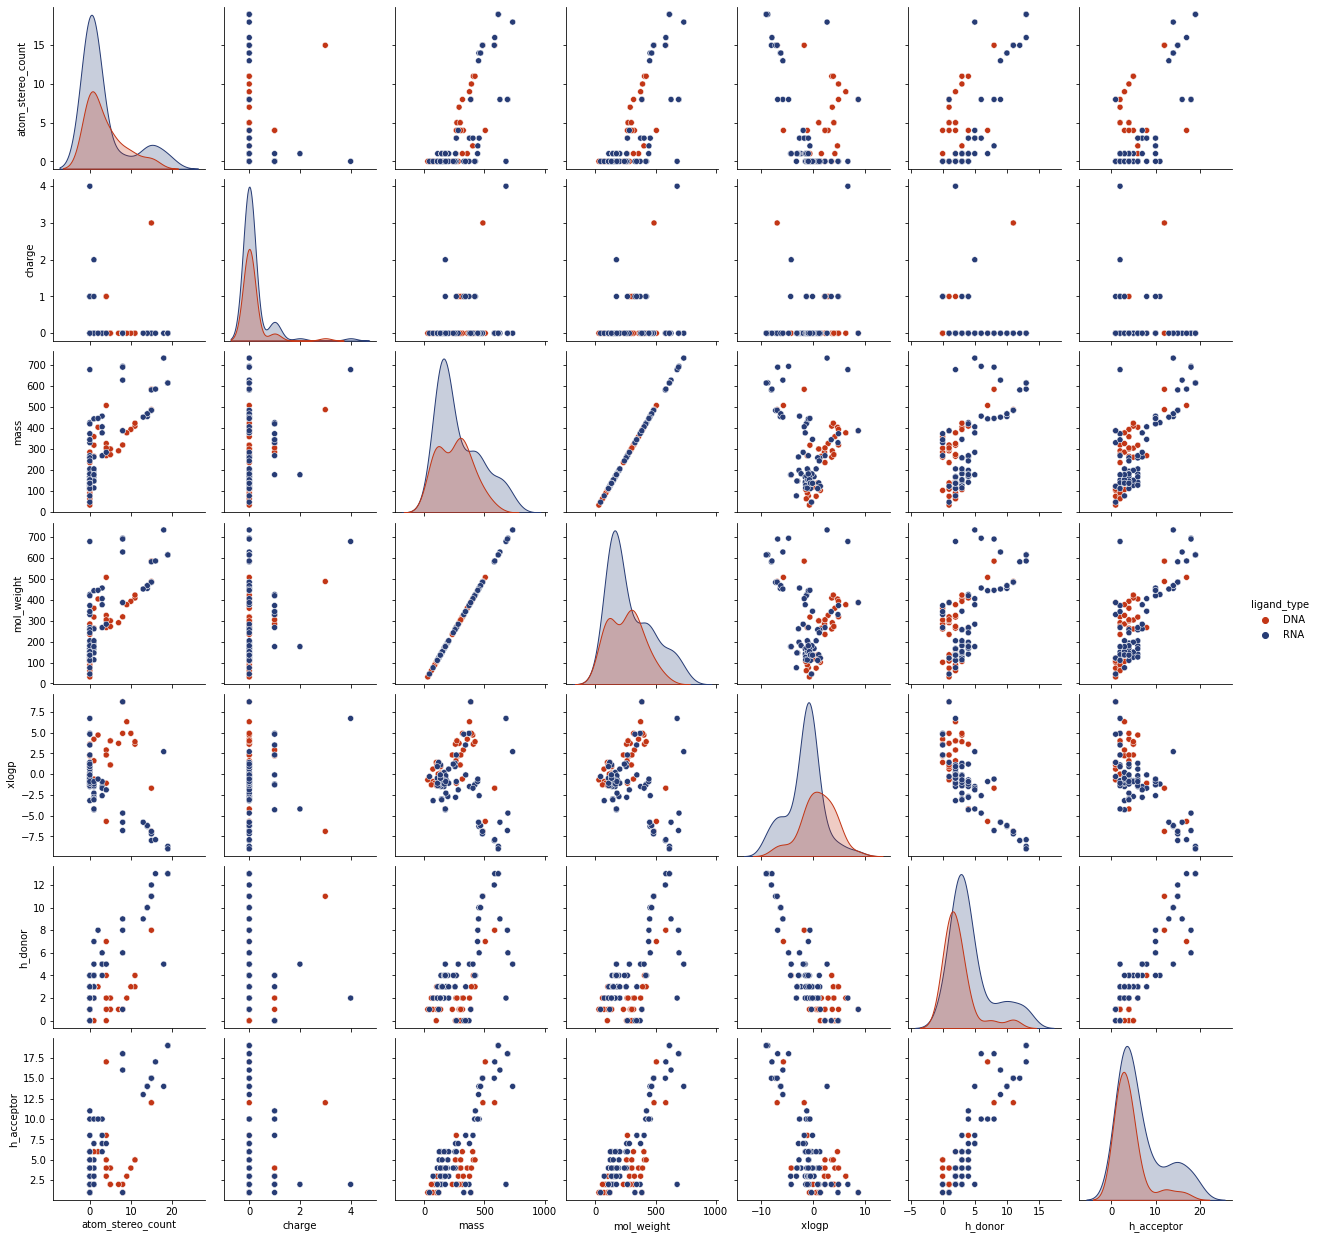

In [ ]:
sns.pairplot(data, hue="ligand_type", palette=nineteensixty)
plt.show()